# Sports Analytics

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

In [2]:
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

In [3]:
data = pd.DataFrame(X, columns=[f'feature_{i+1}' for i in range(X.shape[1])])
data['Outcome'] = y

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Outcome', axis=1), data['Outcome'], test_size=0.2, random_state=42)

In [5]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [6]:
predictions = model.predict(X_test)

In [7]:
accuracy = accuracy_score(y_test, predictions)
print('Accuracy: ', accuracy)

Accuracy:  0.83


In [8]:
conf_matrix = confusion_matrix(y_test, predictions)
print("\nConfusion Matrix: ")
print(conf_matrix)


Confusion Matrix: 
[[75 14]
 [20 91]]


In [9]:
class_report = classification_report(y_test, predictions)
print("\nClassification Report")
print(class_report)


Classification Report
              precision    recall  f1-score   support

           0       0.79      0.84      0.82        89
           1       0.87      0.82      0.84       111

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200



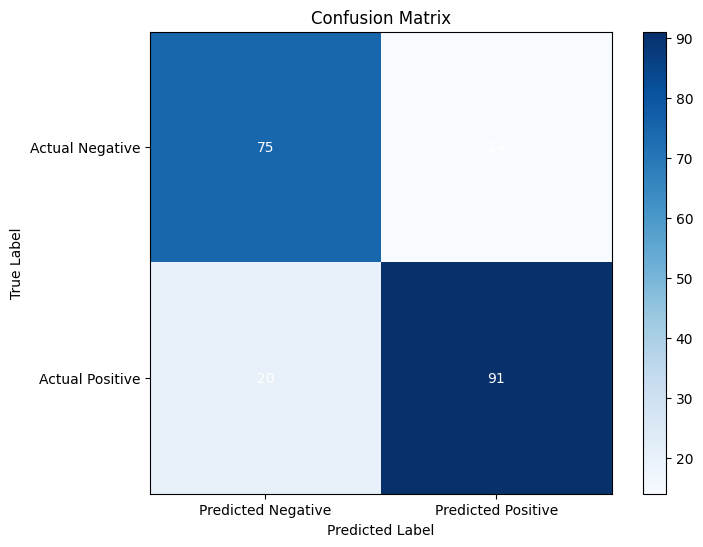

In [10]:
plt.figure(figsize=(8,6))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([0, 1], ["Predicted Negative", "Predicted Positive"])
plt.yticks([0,1], ["Actual Negative", "Actual Positive"])
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(conf_matrix[i, j]), ha="center", va="center", color="white")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()